# Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968837

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00993955, -0.07321119,  0.04481428, ...,  0.02953981,
        -0.0364147 ,  0.03540965],
       [ 0.07092366,  0.04754715, -0.01547137, ...,  0.04100461,
        -0.06771459, -0.04799179],
       [-0.03540671, -0.03331302,  0.03820271, ...,  0.05556069,
        -0.06386457, -0.04113103],
       ...,
       [ 0.02475516, -0.01995844,  0.0065624 , ...,  0.06495267,
         0.0625219 ,  0.06119274],
       [-0.06268387,  0.01690297, -0.01030149, ..., -0.04835094,
         0.00113861,  0.05208772],
       [ 0.03902057, -0.05624127,  0.03043231, ...,  0.07201478,
        -0.01407286, -0.04839121]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 0.7230 - accuracy: 0.7601 - val_loss: 0.5099 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8292 - val_loss: 0.4597 - val_accuracy: 0.8352
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8444 - val_loss: 0.4219 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4161 - accuracy: 0.8535 - val_loss: 0.3971 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8619 - val_loss: 0.3906 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8664 - val_loss: 0.3994 - val_accuracy: 0.8616
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8695 - val_loss: 0.3729 - val_accuracy: 0.8684
Epo

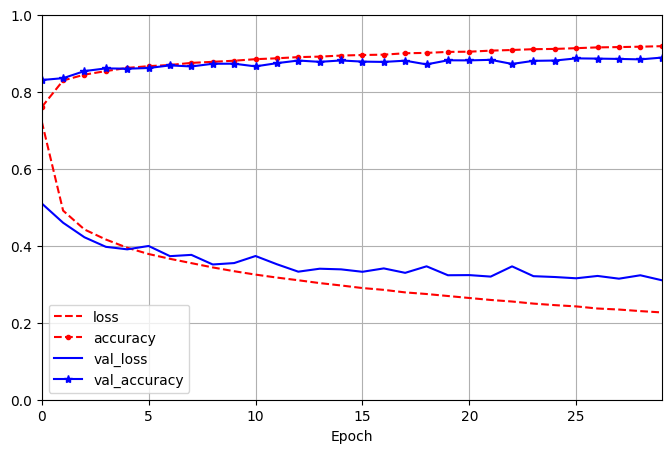

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8865


[0.3279682695865631, 0.8865000009536743]

### Using the model to make predictions

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 81ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [27]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [28]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7497 - root_mean_squared_error: 0.8659 - val_loss: 0.3783 - val_root_mean_squared_error: 0.6151
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3756 - root_mean_squared_error: 0.6129 - val_loss: 1.9425 - val_root_mean_squared_error: 1.3937
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3673 - root_mean_squared_error: 0.6060 - val_loss: 0.4099 - val_root_mean_squared_error: 0.6403
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3407 - root_mean_squared_error: 0.5837 - val_loss: 0.9376 - val_root_mean_squared_error: 0.9683
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3326 - root_mean_squared_error: 0.5768 - val_loss: 1.4711 - val_root_mean_squared_error: 1.2129
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3286 - root_mean_squared_error: 0.5733 - val_loss: 0.3015 - val_

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 50)                450       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,618
Trainable params: 5,601
Non-trainable params: 17
___________________________________________________

## Building Complex Models Using the Functional API

In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6328 - root_mean_squared_error: 1.2778 - val_loss: 0.5584 - val_root_mean_squared_error: 0.7473
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4858 - root_mean_squared_error: 0.6970 - val_loss: 0.5434 - val_root_mean_squared_error: 0.7372
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3992 - root_mean_squared_error: 0.6318 - val_loss: 0.6951 - val_root_mean_squared_error: 0.8337
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3773 - root_mean_squared_error: 0.6143 - val_loss: 0.5711 - val_root_mean_squared_error: 0.7557
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3608 - root_mean_squared_error: 0.6007 - val_loss: 0.4042 - val_root_mean_squared_error: 0.6358
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3483 - root_mean_squared_error: 0.5902 - val_loss: 0.3292 - val_

In [32]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6903 - root_mean_squared_error: 1.3001 - val_loss: 1.3774 - val_root_mean_squared_error: 1.1736
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5777 - root_mean_squared_error: 0.7601 - val_loss: 1.9161 - val_root_mean_squared_error: 1.3842
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5110 - root_mean_squared_error: 0.7148 - val_loss: 0.5260 - val_root_mean_squared_error: 0.7253
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4489 - root_mean_squared_error: 0.6700 - val_loss: 0.4136 - val_root_mean_squared_error: 0.6432
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4188 - root_mean_squared_error: 0.6471 - val_loss: 0.7680 - val_root_mean_squared_error: 0.8763
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3951 - root_mean_squared_error: 0.6286 - val_loss: 1.4718 - val_

In [34]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [36]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
                     validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3328 - dense_8_loss: 1.2486 - dense_9_loss: 2.0910 - dense_8_root_mean_squared_error: 1.1174 - dense_9_root_mean_squared_error: 1.4460 - val_loss: 3.3028 - val_dense_8_loss: 2.5855 - val_dense_9_loss: 9.7584 - val_dense_8_root_mean_squared_error: 1.6079 - val_dense_9_root_mean_squared_error: 3.1238
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5211 - dense_8_loss: 0.4698 - dense_9_loss: 0.9827 - dense_8_root_mean_squared_error: 0.6854 - dense_9_root_mean_squared_error: 0.9913 - val_loss: 1.0308 - val_dense_8_loss: 0.5794 - val_dense_9_loss: 5.0928 - val_dense_8_root_mean_squared_error: 0.7612 - val_dense_9_root_mean_squared_error: 2.2567
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4612 - dense_8_loss: 0.4275 - dense_9_loss: 0.7648 - dense_8_root_mean_squared_error: 0.6538 - dense_9_root_mean_squared_error: 0.8745 - val_loss: 0.5173 - val_dense_8_loss

In [37]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3594 - dense_8_loss: 0.3507 - dense_9_loss: 0.4376 - dense_8_root_mean_squared_error: 0.5922 - dense_9_root_mean_squared_error: 0.6615


In [38]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 66ms/step


In [39]:
y_pred 

{'dense_8': array([[0.4461567],
        [1.197814 ],
        [3.3292706]], dtype=float32),
 'dense_9': array([[0.58082014],
        [1.2395104 ],
        [3.0452085 ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models

In [40]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
            
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
        
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer, metrics=["RootMeanSquaredError"])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
                     validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5501 - output_1_loss: 1.4030 - output_2_loss: 2.8745 - output_1_root_mean_squared_error: 1.1845 - output_2_root_mean_squared_error: 1.6954 - val_loss: 2.9679 - val_output_1_loss: 2.0576 - val_output_2_loss: 11.1603 - val_output_1_root_mean_squared_error: 1.4344 - val_output_2_root_mean_squared_error: 3.3407
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5382 - output_1_loss: 0.4745 - output_2_loss: 1.1118 - output_1_root_mean_squared_error: 0.6888 - output_2_root_mean_squared_error: 1.0544 - val_loss: 1.7867 - val_output_1_loss: 1.2848 - val_output_2_loss: 6.3036 - val_output_1_root_mean_squared_error: 1.1335 - val_output_2_root_mean_squared_error: 2.5107
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - output_1_loss: 0.4295 - output_2_loss: 0.7430 - output_1_root_mean_squared_error: 0.6553 - output_2_root_mean_squared_error: 0.8620 - val_loss: 0.77

## Saving and Restoring a Model

In [42]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model\assets


In [43]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 70ms/step


## Using Callbacks

In [44]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.3751 - output_1_loss: 0.3661 - output_2_loss: 0.4563 - output_1_root_mean_squared_error: 0.6050 - output_2_root_mean_squared_error: 0.6755 - val_loss: 0.5544 - val_output_1_loss: 0.5560 - val_output_2_loss: 0.5400 - val_output_1_root_mean_squared_error: 0.7457 - val_output_2_root_mean_squared_error: 0.7349
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3708 - output_1_loss: 0.3630 - output_2_loss: 0.4410 - output_1_root_mean_squared_error: 0.6025 - output_2_root_mean_squared_error: 0.6640 - val_loss: 0.7943 - val_output_1_loss: 0.8001 - val_output_2_loss: 0.7427 - val_output_1_root_mean_squared_error: 0.8945 - val_output_2_root_mean_squared_error: 0.8618
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3594 - output_1_loss: 0.3515 - output_2_loss: 0.4302 - output_1_root_mean_squared_error: 0.5929 - output_2_root_mean_squared_error: 0.6559 - val_loss: 0.345

In [47]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3424 - output_1_loss: 0.3359 - output_2_loss: 0.4010 - output_1_root_mean_squared_error: 0.5796 - output_2_root_mean_squared_error: 0.6333 - val_loss: 1.0213 - val_output_1_loss: 1.0844 - val_output_2_loss: 0.4528 - val_output_1_root_mean_squared_error: 1.0414 - val_output_2_root_mean_squared_error: 0.6729
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3433 - output_1_loss: 0.3372 - output_2_loss: 0.3978 - output_1_root_mean_squared_error: 0.5807 - output_2_root_mean_squared_error: 0.6307 - val_loss: 1.4597 - val_output_1_loss: 1.5181 - val_output_2_loss: 0.9344 - val_output_1_root_mean_squared_error: 1.2321 - val_output_2_root_mean_squared_error: 0.9667
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3447 - output_1_loss: 0.3391 - output_2_loss: 0.3955 - output_1_root_mean_squared_error: 0.5823 - output_2_root_mean_squared_error: 0.6289 - val_loss: 0.425

In [48]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [49]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.64
Epoch=1, val/train=4.82
Epoch=2, val/train=1.15
Epoch=3, val/train=1.76
Epoch=4, val/train=1.97
Epoch=5, val/train=3.20
Epoch=6, val/train=1.10
Epoch=7, val/train=2.16
Epoch=8, val/train=1.57
Epoch=9, val/train=2.51


## Using TensorBoard for Visualization

In [82]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59

In [83]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.3246 - root_mean_squared_error: 1.5247 - val_loss: 1.6229 - val_root_mean_squared_error: 1.2739
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8102 - root_mean_squared_error: 0.9001 - val_loss: 1.0834 - val_root_mean_squared_error: 1.0409
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7198 - root_mean_squared_error: 0.8484 - val_loss: 0.7063 - val_root_mean_squared_error: 0.8404
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6670 - root_mean_squared_error: 0.8167 - val_loss: 0.6388 - val_root_mean_squared_error: 0.7992
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6280 - root_mean_squared_error: 0.7925 - val_loss: 0.5750 - val_root_mean_squared_error: 0.7583
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5925 - root_mean_squared_error: 0.7697 - val_loss: 0.5464 - val_

In [86]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6789 - root_mean_squared_error: 1.2957 - val_loss: 15.9849 - val_root_mean_squared_error: 3.9981
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7795 - root_mean_squared_error: 0.8829 - val_loss: 0.5694 - val_root_mean_squared_error: 0.7546
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5599 - root_mean_squared_error: 0.7482 - val_loss: 0.4927 - val_root_mean_squared_error: 0.7019
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5107 - root_mean_squared_error: 0.7147 - val_loss: 0.4652 - val_root_mean_squared_error: 0.6821
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4802 - root_mean_squared_error: 0.6929 - val_loss: 0.4349 - val_root_mean_squared_error: 0.6595
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4584 - root_mean_squared_error: 0.6770 - val_loss: 0.4156 - val

In [88]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100 # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [90]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")

    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [92]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True,
                                      directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.004651162773370743

Best val_accuracy So Far: 0.004651162773370743
Total elapsed time: 00h 01m 09s


In [97]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [98]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 51,
 'learning_rate': 0.0003491260272208854,
 'optimizer': 'adam'}

In [99]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 09 summary
Hyperparameters:
n_hidden: 7
n_neurons: 51
learning_rate: 0.0003491260272208854
optimizer: adam
Score: 0.004651162773370743


In [100]:
best_trial.metrics.get_last_value("val_accuracy")

0.004651162773370743